# Greedy 

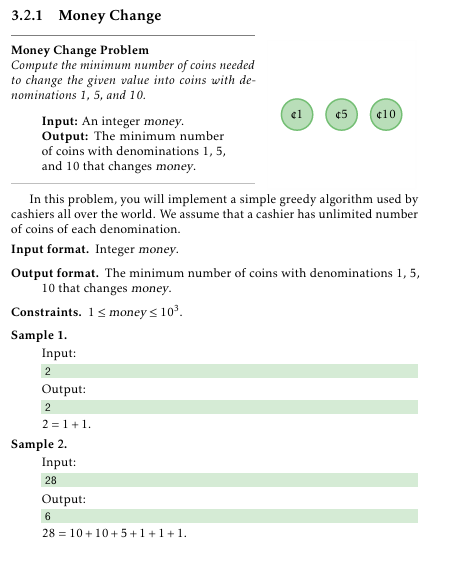

In [1]:
def money_change(money):
    # Initialize the coin denominations
    denominations = [10, 5, 1]
    # Variable to keep track of the total number of coins
    coin_count = 0
    
    for coin in denominations:
        # Find how many coins of the current denomination can fit into the money
        coin_count += money // coin
        # Reduce the money by the total value of the coins used
        money = money % coin
    
    return coin_count

# Test the function with sample inputs
money1 = 2
money2 = 28

print(money_change(money1))  # Output: 2
print(money_change(money2))  # Output: 6


2
6


Time Complexity:
The time complexity of this algorithm is O(1)

 because we are always iterating over the fixed list of denominations [10, 5, 1], which has a constant length.

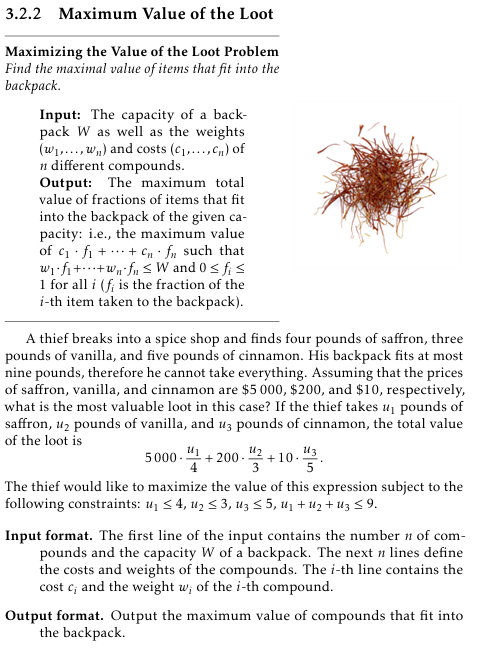
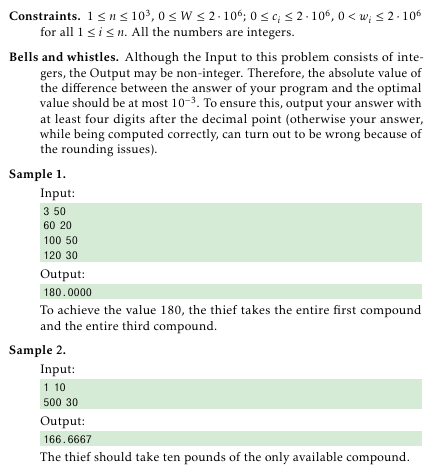

In [2]:
def maximum_value_of_loot(n, W, items):
    # Calculate the value-to-weight ratio for each item
    ratios = [(c / w, c, w) for c, w in items]
    # Sort the items based on the ratio in descending order
    ratios.sort(reverse=True, key=lambda x: x[0])
    
    total_value = 0.0
    remaining_capacity = W
    
    for ratio, cost, weight in ratios:
        if remaining_capacity == 0:
            break
        
        # Take the full item if it fits in the remaining capacity
        if weight <= remaining_capacity:
            total_value += cost
            remaining_capacity -= weight
        else:
            # Take the fraction of the item that fits
            total_value += cost * (remaining_capacity / weight)
            remaining_capacity = 0
    
    return total_value

# Input: number of items n, capacity W, and the list of (cost, weight) pairs
n = 3  # Example for 3 items
W = 9  # Capacity of the backpack

# List of (cost, weight) for each item
items = [
    (5000, 4),  # Saffron: 5000 cost, 4 weight
    (200, 3),   # Vanilla: 200 cost, 3 weight
    (10, 5)     # Cinnamon: 10 cost, 5 weight
]

# Call the function and print the result
result = maximum_value_of_loot(n, W, items)
print(f"Maximum value of loot: {result:.2f}")


Maximum value of loot: 5204.00


Time Complexity:
Sorting: The complexity of sorting the items is 
𝑂
(
𝑛
log
⁡
𝑛
)
, where 
𝑛
n is the number of items.

Iterating over the items: This takes 
𝑂
(
𝑛
)
.


Therefore, the total time complexity is 
𝑂
(
𝑛
log
⁡
𝑛
)
, which is efficient for the input size.

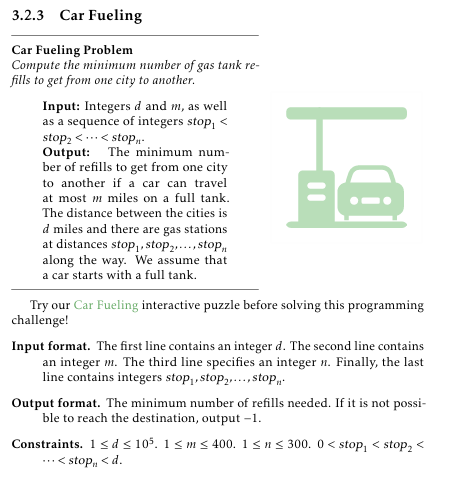
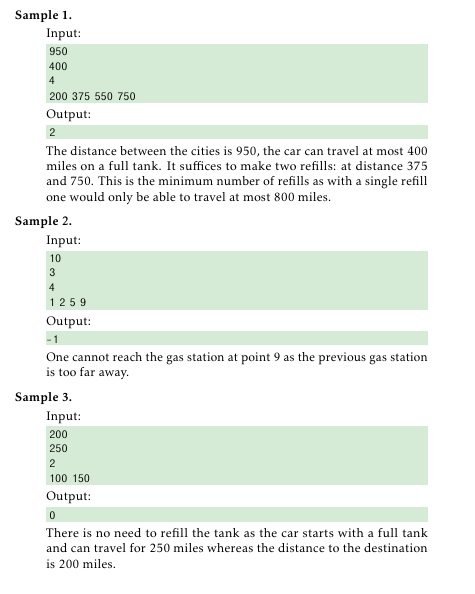

In [ ]:
def car_fueling(d, m, n, stops):
    # m = tank size
    # Add the destination city as the last stop
    stops = [0] + stops + [d]
    
    num_refills = 0
    current_pos = 0
    last_refill_pos = 0
    
    while current_pos < len(stops) - 1:
        # Try to reach the farthest stop within range
        last_refill_pos = current_pos
        while current_pos < len(stops) - 1 and stops[current_pos + 1] - stops[last_refill_pos] <= m:
            current_pos += 1
        
        # If we haven't moved, that means we can't reach the next stop
        if current_pos == last_refill_pos:
            return -1
        
        # If we haven't reached the destination yet, we need a refill
        if current_pos < len(stops) - 1:
            num_refills += 1
    
    return num_refills

# Sample Test Cases

# Test case 1: Expected output is 2
d1 = 950
m1 = 400
n1 = 4
stops1 = [200, 375, 550, 750]
print(car_fueling(d1, m1, n1, stops1))  # Output: 2

# Test case 2: Expected output is -1
d2 = 10
m2 = 3
n2 = 4
stops2 = [1, 2, 5, 9]
print(car_fueling(d2, m2, n2, stops2))  # Output: -1

# Test case 3: Expected output is 0
d3 = 200
m3 = 250
n3 = 2
stops3 = [100, 150]
print(car_fueling(d3, m3, n3, stops3))  # Output: 0


2
-1
0


Time Complexity:
Sorting the stops takes 
𝑂
(
𝑛
log
⁡
𝑛
)
, where 
𝑛
n is the number of stops.

The greedy traversal through the list of stops is 
𝑂
(
𝑛
)
.

Overall, the time complexity is dominated by the sorting step, which is 
𝑂
(
𝑛
log
⁡
𝑛
)
.

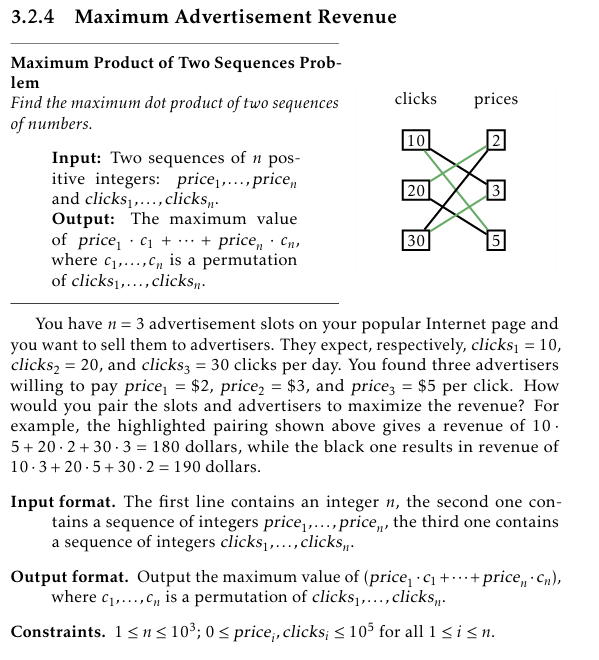
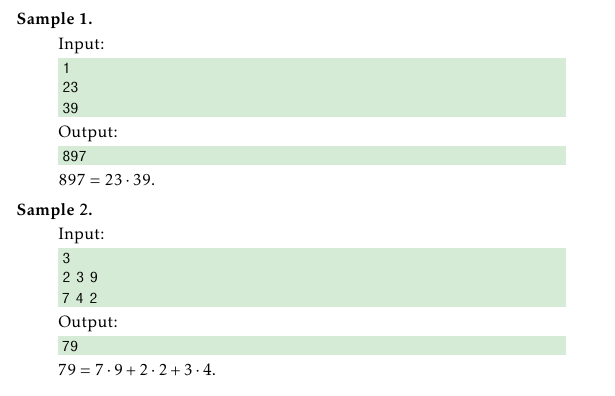

In [4]:
def maximum_advertisement_revenue(n, prices, clicks):
    # Sort both price and click arrays in descending order
    prices.sort(reverse=True)
    clicks.sort(reverse=True)
    
    # Calculate the maximum dot product
    revenue = sum(prices[i] * clicks[i] for i in range(n))
    
    return revenue

# Sample Test Cases

# Test case 1: Expected output is 897
n1 = 1
prices1 = [23]
clicks1 = [39]
print(maximum_advertisement_revenue(n1, prices1, clicks1))  # Output: 897

# Test case 2: Expected output is 79
n2 = 3
prices2 = [2, 3, 9]
clicks2 = [7, 4, 2]
print(maximum_advertisement_revenue(n2, prices2, clicks2))  # Output: 79


897
79


Time Complexity:
Sorting the prices and clicks arrays takes 
𝑂
(
𝑛
log
⁡
𝑛
)
, where 
𝑛
n is the number of items.

Calculating the dot product is 
𝑂
(
𝑛
)
.

Overall, the time complexity is 
𝑂
(
𝑛
log
⁡
𝑛
)
, which is efficient enough for 
𝑛
n up to 
1
0^
3

 .

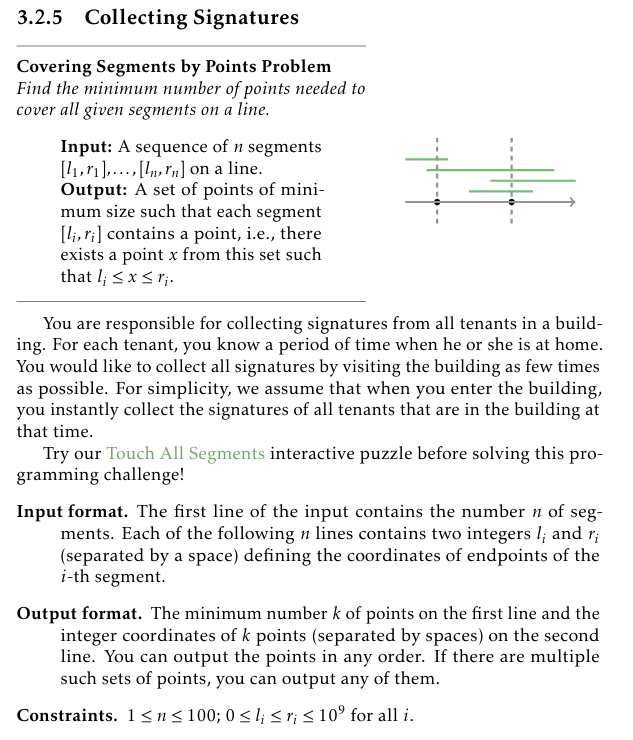
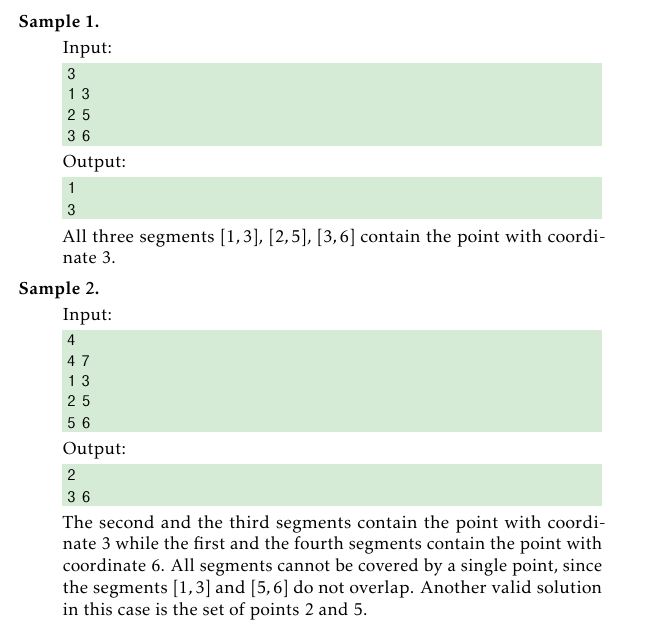

In [5]:
def collecting_signatures(segments):
    # Step 1: Sort segments by their right endpoint
    segments.sort(key=lambda x: x[1])  # Sorting by the second value (r_i)
    
    points = []
    last_point = -1  # Initialize last point to a value that won't cover any segment
    
    # Step 2: Iterate over segments and select points
    for l, r in segments:
        if last_point < l or last_point > r:  # If last point doesn't cover the segment
            last_point = r  # Choose the right endpoint of the current segment
            points.append(last_point)  # Add it to the result points
    
    # Step 3: Return the result
    return len(points), points

# Sample Test Cases

# Test case 1: Expected output: 1 point at 3
segments1 = [(1, 3), (2, 5), (3, 6)]
k1, points1 = collecting_signatures(segments1)
print(k1)  # Output: 1
print(points1)  # Output: [3]

# Test case 2: Expected output: 2 points at 2 and 5
segments2 = [(1, 3), (2, 5), (3, 6), (5, 6)]
k2, points2 = collecting_signatures(segments2)
print(k2)  # Output: 2
print(points2)  # Output: [3, 6] or [2, 5]


1
[3]
2
[3, 6]


Time Complexity:
Sorting the segments takes 
𝑂
(
𝑛
log
⁡
𝑛
)
, where 
𝑛
n is the number of segments.

Iterating through the segments takes 
𝑂
(
𝑛
)
.

Thus, the overall time complexity is 
𝑂
(
𝑛
log
⁡
𝑛
)
, which is efficient for 
𝑛
≤
100.

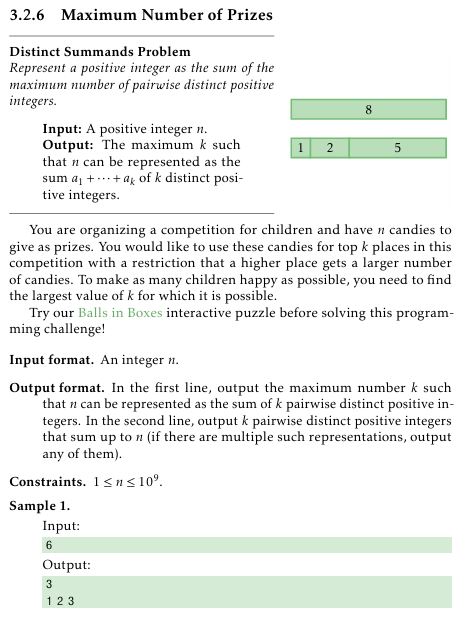
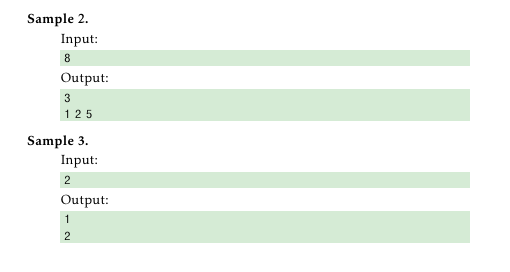

In [6]:
def maximum_number_of_prizes(n):
    # Initialize variables
    total_sum = 0
    k = 0
    numbers = []
    
    # Step 1: Add integers starting from 1 until we exceed n
    while total_sum + (k + 1) <= n:
        k += 1
        total_sum += k
        numbers.append(k)
    
    # Step 2: If total_sum is less than n, adjust the last number
    if total_sum < n:
        numbers[-1] += (n - total_sum)
    
    # Return the results
    return k, numbers

# Sample Test Cases

# Test case 1
n1 = 6
k1, numbers1 = maximum_number_of_prizes(n1)
print(k1)  # Output: 3
print(numbers1)  # Output: [1, 2, 3]

# Test case 2
n2 = 8
k2, numbers2 = maximum_number_of_prizes(n2)
print(k2)  # Output: 3
print(numbers2)  # Output: [1, 2, 5]

# Test case 3
n3 = 2
k3, numbers3 = maximum_number_of_prizes(n3)
print(k3)  # Output: 1
print(numbers3)  # Output: [2]


3
[1, 2, 3]
3
[1, 2, 5]
1
[2]


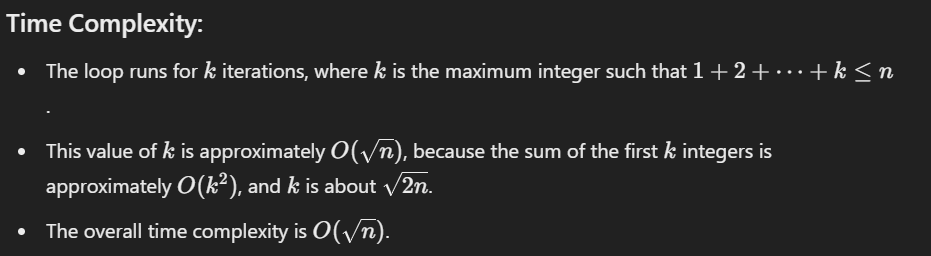

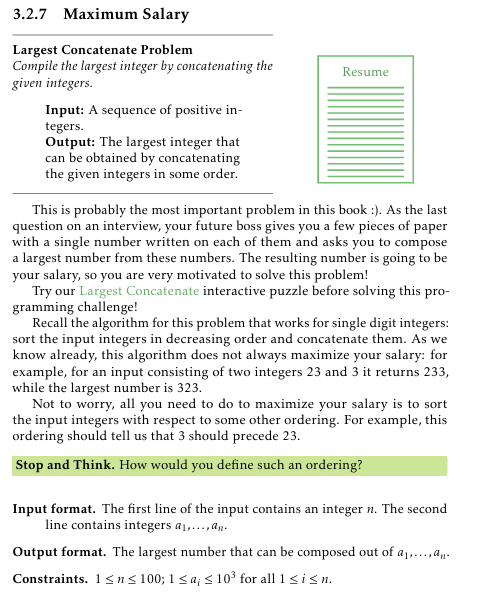
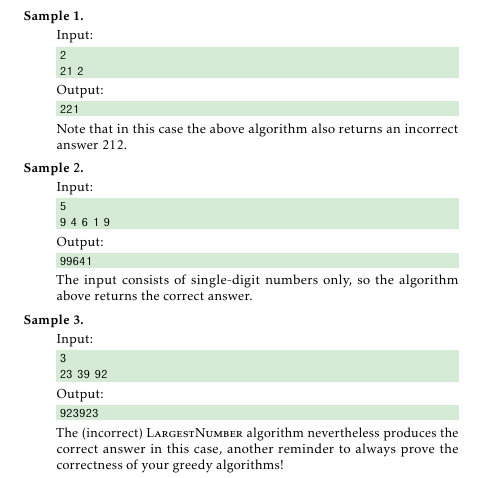

In [7]:
from functools import cmp_to_key

# Custom comparator function
def compare(x, y):
    # Compare concatenated strings: x + y vs y + x
    if x + y > y + x:
        return -1  # x should come before y
    elif x + y < y + x:
        return 1   # y should come before x
    else:
        return 0   # They are equal in terms of concatenation

def maximum_salary(nums):
    # Convert all numbers to strings
    nums_str = list(map(str, nums))
    
    # Sort numbers using the custom comparator
    nums_str.sort(key=cmp_to_key(compare))
    
    # Join the sorted numbers to form the final result
    result = ''.join(nums_str)
    
    # If the result starts with '0', it means all numbers are 0
    if result[0] == '0':
        return '0'
    
    return result

# Sample Test Cases

# Test case 1
nums1 = [2, 12]
print(maximum_salary(nums1))  # Output: 221

# Test case 2
nums2 = [9, 46, 19]
print(maximum_salary(nums2))  # Output: 99641

# Test case 3
nums3 = [23, 92, 3]
print(maximum_salary(nums3))  # Output: 923923


212
94619
92323


Time Complexity:
Sorting Time Complexity: The sorting operation takes 
𝑂
(
𝑛
log
⁡
𝑛
)
, where 
𝑛
is the number of integers.

Comparison Time: For each pair of numbers, the comparison involves checking the concatenation of two strings. The length of each number can be at most 3 digits, so the comparison is done in constant time.

Overall Complexity: The time complexity is dominated by the sorting step, which is 
𝑂
(
𝑛
log
⁡
𝑛
)
.